In [ ]:
import os

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from keras.layers import Activation, Dense, Input
from keras.models import Model
from keras.optimizers import Adam

In [3]:
# to print all the weights in terminal
np.set_printoptions(threshold=sys.maxsize)

diabetes_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cadvlsi_diabetes/diabetes.csv')

# Splitting dataset into train and test values

In [6]:
# X is variables dataset, y is only outcome values
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df.Outcome.values

# using train_test_split to make train and test 
# datasets for variables and outcomes 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2) # random state controls shuffling process

# printing example of dataset
df_ex = pd.DataFrame(X_train, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
print(df_ex.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          3.0     84.0           72.0           32.0      0.0  37.2   
1          0.0    118.0           64.0           23.0     89.0   0.0   
2         10.0     92.0           62.0            0.0      0.0  25.9   
3          2.0    158.0           90.0            0.0      0.0  31.6   
4         10.0    139.0           80.0            0.0      0.0  27.1   

   DiabetesPedigreeFunction   Age  
0                     0.267  28.0  
1                     1.731  21.0  
2                     0.167  31.0  
3                     0.805  66.0  
4                     1.441  57.0  


# Normalizing Data and displaying example of normalized dataset

In [ ]:
# normalize the data
nl = Normalizer()
X_train = nl.transform(X_train)
X_test = nl.transform(X_test)




# Printing example of normalized dataset

In [8]:
# converting numpy array to pandas to display example of normalized dataset
df_ex = pd.DataFrame(X_train, columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
print(df_ex.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.024143  0.675994       0.579423       0.257522  0.000000  0.299369   
1     0.000000  0.719272       0.390113       0.140197  0.542501  0.000000   
2     0.084395  0.776438       0.523252       0.000000  0.000000  0.218584   
3     0.010203  0.806047       0.459141       0.000000  0.000000  0.161209   
4     0.057922  0.805118       0.463377       0.000000  0.000000  0.156969   

   DiabetesPedigreeFunction       Age  
0                  0.002149  0.225331  
1                  0.010551  0.128006  
2                  0.001409  0.261626  
3                  0.004107  0.336703  
4                  0.008347  0.330156  


# defining Neural Network

In [9]:
def nn():

    # input 1x8
    inputs = Input(name='inputs', shape=[X_train.shape[1], ])
    
    layer = Dense(128, name='FC1')(inputs)
    layer = Activation('relu', name='Activation1')(layer)
   
    layer = Dense(128, name='FC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
  
    layer = Dense(128, name='FC3')(layer)
    layer = Activation('relu', name='Activation3')(layer)

    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model


# Compiling and training the model

In [10]:
model = nn()
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer=Adam(), metrics=['accuracy'])


history = model.fit(x=X_train, y=y_train, epochs=500)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 128)               1152      
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 Activation2 (Activation)    (None, 128)               0         
                                                                 
 FC3 (Dense)                 (None, 128)               16512     
                                                                 
 Activation3 (Activation)    (None, 128)               0     

# Saving weights so they can be loaded and used later

In [ ]:
model.save_weights('weights_new.hdf5')

model.load_weights('weights_new.hdf5')

# Generating graphs for model activation and loss

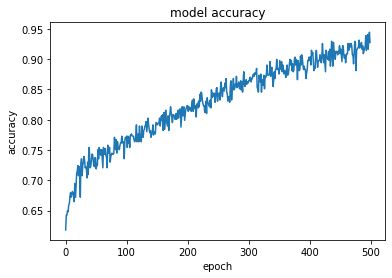

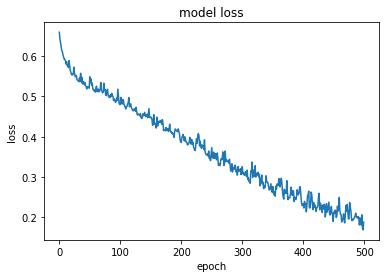

In [11]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Running a for loop to extract the weights of every layer

In [12]:
# code to print weights
# to get complete list it has to be output in the terminal
# since printing it to a file truncates values the weights
for lay in model.layers:
    name = lay.name
    weights = lay.get_weights()
    print(name)
    print(" ")
    print(weights)
    print(" ")

Streaming output truncated to the last 5000 lines.
        -4.17231798e-01, -7.96013549e-02, -3.05093050e-01,
        -5.48087835e-01,  1.62052643e-02, -1.96464583e-01,
        -1.82230681e-01,  2.18393505e-01,  7.43548274e-02,
         3.98925066e-01,  1.12286173e-01, -1.86848953e-01,
         4.33878927e-03,  3.25713396e-01, -1.00349290e-02,
         3.01164389e-01, -5.18004596e-01,  2.01566041e-01,
        -1.47076204e-01, -1.51162609e-01,  3.54046494e-01,
         9.18372691e-01, -1.09151065e-01, -4.07892317e-01,
         1.10887781e-01,  4.30446208e-01,  4.83915657e-02,
         4.22684878e-01,  4.81404394e-01,  4.39763255e-02,
        -7.25398883e-02, -4.01938558e-01, -5.05119860e-02,
        -4.93380457e-01,  2.53146648e-01, -1.18231647e-01,
         1.59614578e-01,  2.19573095e-01, -1.43996418e-01,
        -7.50287324e-02,  2.72085249e-01,  7.28491664e-01,
         3.16357553e-01, -3.84434402e-01,  3.73037457e-01,
        -2.76767015e-02, -1.03154220e-01, -2.11682722e-01,
     

# Running test case 

In [13]:
x = [[0.084395,0.776438,0.523252,0.000000,0.000000,0.218584,0.001409,0.261626
]]

ans = model.predict(x)
print(ans)

if ans[0][0] >= 0.5:
    print("Yes, you have diabetes")
else:
    print("No, you dont have diabetes")

1/1 [==============================] - 0s 97ms/step
[[0.11691472]]
No, you dont have diabetes
